In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


c:\Users\ekene\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ekene\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Nov 11 21:27:20 2024).


In [2]:
# Median salary analysis by country
df.pivot_table(values= 'salary_year_avg', index= 'job_country', columns= 'job_title_short', aggfunc= 'median')


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [8]:
# TOP 6 COUNTRries
top_countries = df['job_country'].value_counts().head(6).index

In [12]:
df_job_country_salary = df.pivot_table(
    values= 'salary_year_avg',
    index= 'job_country',
    columns= 'job_title_short',
    aggfunc= 'median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]
top_jobs = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_job_country_salary = df_job_country_salary[top_jobs]

df_job_country_salary

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_country,,,
United States,90000.0,130000.0,125000.0
India,100500.0,114008.0,147500.0
United Kingdom,87750.0,105300.0,110000.0
France,69175.0,88128.0,98301.5
Germany,103750.0,131560.0,147500.0
Spain,91977.0,88128.0,133000.0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Spain')])

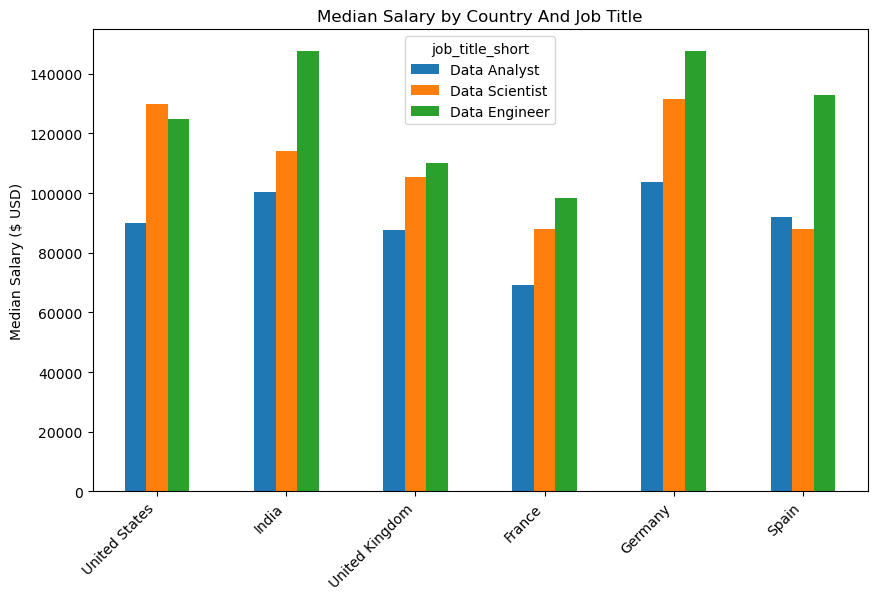

In [15]:
df_job_country_salary.plot(kind= 'bar', figsize= (10,6))
plt.title('Median Salary by Country And Job Title')
plt.ylabel('Median Salary ($ USD)')
plt.xlabel('')
plt.xticks(rotation = 45, ha= 'right')